Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

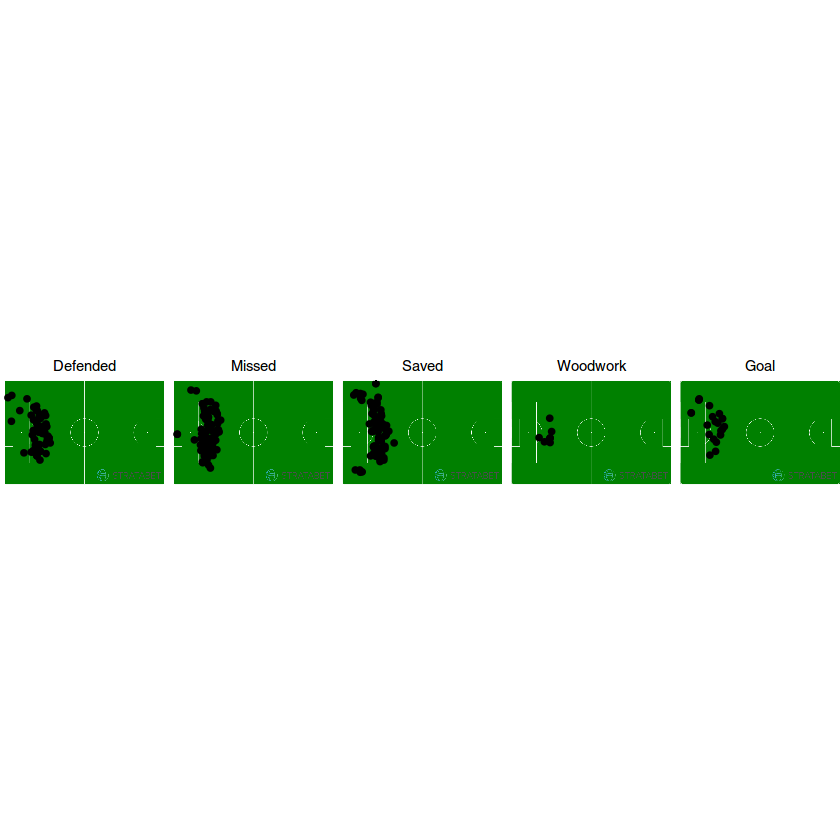

In [110]:
library(data.table)
library(ggplot2)
library(grid)
library(png)

chances_files <- file.path('data', list.files('data', pattern='StrataData_Chances_.*.csv'))
chances <- rbindlist(lapply(chances_files, read.csv))
background <- readPNG(file.path('images', 'field.png'))
background_grob <- rasterGrob(background, interpolate=TRUE)

# excluding penalty kicks
chances <- chances[chances$location_x != '-' && chances$location_y != '-']
chances$location_x <- as.numeric(as.character(chances$location_x))
chances$location_y <- as.numeric(as.character(chances$location_y))

free_kicks <- chances[chances$type %in% c('Direct Free-Kick', 'Direct free kick')]
levels(free_kicks$outcome) <- c(levels(free_kicks$outcome), 'Goal')
free_kicks$outcome[free_kicks$outcome == '-'] <- 'Goal'

ggplot(free_kicks, aes(location_y, location_x)) +
   theme_void() +
   coord_fixed(xlim=c(0, 420), ylim=c(-136, 136), expand=FALSE) +
   annotation_custom(background_grob, xmin=0, xmax=420, ymin=-136, ymax=136) +
   scale_color_brewer(palette='Set1') +
   geom_point() + facet_grid(. ~ outcome)